In [1]:
#Importing libraries
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
#Reading CSV file
churn_df = pd.read_csv('Bank Customer Churn Prediction.csv')
churn_df

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
#Developing a new Dataframe
new_churn_df = churn_df[['credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'churn']].dropna()
new_churn_df

,credit_score,age,tenure,balance,products_number,credit_card,churn
0,619,42,2,0.00,1,1,1
1,608,41,1,83807.86,1,0,0
2,502,42,8,159660.80,3,1,1
3,699,39,1,0.00,2,0,0
4,850,43,2,125510.82,1,1,0
...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0
9996,516,35,10,57369.61,1,1,0
9997,709,36,7,0.00,1,0,1
9998,772,42,3,75075.31,2,1,1


In [4]:
new_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   credit_score     10000 non-null  int64  
 1   age              10000 non-null  int64  
 2   tenure           10000 non-null  int64  
 3   balance          10000 non-null  float64
 4   products_number  10000 non-null  int64  
 5   credit_card      10000 non-null  int64  
 6   churn            10000 non-null  int64  
dtypes: float64(1), int64(6)
memory usage: 547.0 KB


In [5]:
#Splitting data into a train and test sets
X_train, X_test, y_train, y_test = train_test_split(new_churn_df[['credit_score',
                                                                  'age', 'tenure', 'balance', 'products_number', 'credit_card']],
                                                   new_churn_df['churn'], test_size=0.2, random_state=40)

In [6]:
#Training classifier model
model = DecisionTreeClassifier(max_depth = 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [7]:
#Predicting values from a test set
new_predict = model.predict(X_test)

In [8]:
#Developing a new Dataframe with values from a test set
y_tester = pd.DataFrame(y_test)
y_tester = y_tester.reset_index(drop=True)
y_tester.head(10)

,churn
0,1
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [9]:
#Developing a new Dataframe with predicted values
newest = pd.DataFrame(new_predict)
newest = newest.rename(columns={0:'churn_predicted'})
newest.head(10)

,churn_predicted
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [10]:
#Concatenating y_tester Dataframe and Newest Dataframe
concat_df = pd.concat([y_tester, newest], axis=1)
concat_df

,churn,churn_predicted
0,1,0
1,0,0
2,1,0
3,0,0
4,0,0
...,...,...
1995,0,0
1996,1,0
1997,0,0
1998,0,0


In [11]:
#Adding result column to Dataframe to display correctness
concat_df['result'] = concat_df.apply(lambda row: 'correct' if row['churn'] == row['churn_predicted'] else
                                      'false', axis=1)
concat_df

,churn,churn_predicted,result
0,1,0,false
1,0,0,correct
2,1,0,false
3,0,0,correct
4,0,0,correct
...,...,...,...
1995,0,0,correct
1996,1,0,false
1997,0,0,correct
1998,0,0,correct


In [12]:
#Testing accuracy of model when max_depth is set at different values
i=0

max_depth = []
percentage_correct = []

for i in range(1, 21):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    new_predict = model.predict(X_test)
    y_tester = pd.DataFrame(y_test)
    y_tester = y_tester.reset_index(drop=True)
    newest = pd.DataFrame(new_predict)
    newest = newest.rename(columns={0:'churn_predicted'})
    concat_df = pd.concat([y_tester, newest], axis=1)
    concat_df['result'] = concat_df.apply(lambda row: 'correct' if row['churn'] == row['churn_predicted'] else
    'false', axis=1)
    correct = concat_df['result'].value_counts()['correct'] / len(concat_df)
    max_depth.append(i)
    percentage_correct.append(f'{correct:.2%}')
decision_df = pd.DataFrame()
decision_df['max_depth'] = max_depth
decision_df['percentage_correct'] = percentage_correct
decision_df

,max_depth,percentage_correct
0,1,80.80%
1,2,82.70%
2,3,83.65%
3,4,84.95%
4,5,85.40%
5,6,85.30%
6,7,85.30%
7,8,85.10%
8,9,84.80%
9,10,83.70%


In [13]:
#Developing Dataframe containing accuracy values for graph
i=0

max_depth = []
percentage_correct = []

for i in range(1, 21):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    new_predict = model.predict(X_test)
    y_tester = pd.DataFrame(y_test)
    y_tester = y_tester.reset_index(drop=True)
    y_predicted = pd.DataFrame(new_predict)
    y_predicted = y_predicted.rename(columns={0:'churn_predicted'})
    concat_df = pd.concat([y_tester, y_predicted], axis=1)
    concat_df['result'] = concat_df.apply(lambda row: 'correct' if row['churn'] == row['churn_predicted'] else
    'false', axis=1)
    correct = concat_df['result'].value_counts()['correct'] / len(concat_df) * 100
    max_depth.append(i)
    percentage_correct.append(correct)
    decision_df = pd.DataFrame()
    decision_df['max_depth'] = max_depth
    decision_df['percentage_correct'] = percentage_correct

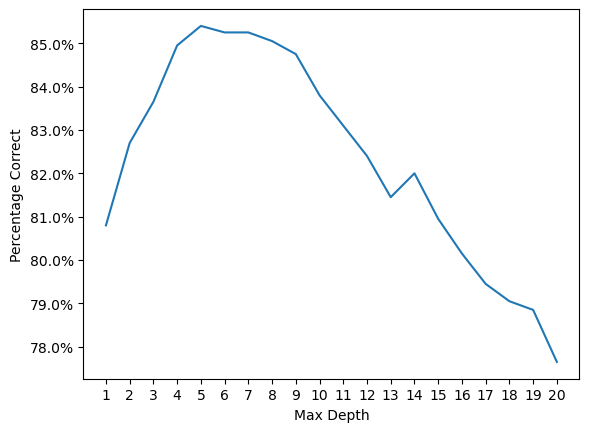

In [14]:
#Plotting accuracy values for each max_depth value
fig, ax = plt.subplots()
plt.plot(decision_df['max_depth'], decision_df['percentage_correct'])
plt.xlabel('Max Depth')
plt.ylabel('Percentage Correct')
plt.xticks(np.arange(min(decision_df['max_depth']), max(decision_df['max_depth'] + 1)))
ax.yaxis.set_major_formatter(PercentFormatter())

In [15]:
#Training model with max_depth set to 5
model = DecisionTreeClassifier(max_depth = 5)
model.fit(X_train, y_train)
new_predict = model.predict(X_test)
y_tester = pd.DataFrame(y_test)
y_tester = y_tester.reset_index(drop=True)
newest = pd.DataFrame(new_predict)
newest = newest.rename(columns={0:'churn_predicted'})
concat_df = pd.concat([y_tester, newest], axis=1)
concat_df['result'] = concat_df.apply(lambda row: 'correct' if row['churn'] == row['churn_predicted'] else
                                                  'false', axis=1)
concat_df

,churn,churn_predicted,result
0,1,0,false
1,0,0,correct
2,1,0,false
3,0,0,correct
4,0,0,correct
...,...,...,...
1995,0,0,correct
1996,1,0,false
1997,0,0,correct
1998,0,0,correct


In [16]:
#Concatenating test set Dataframe and concat_df Dataframe
result_df = X_test.copy()
result_df = result_df.reset_index(drop=True)
result_df = pd.concat([result_df, concat_df], axis=1)
result_df.head(50)

,credit_score,age,tenure,balance,products_number,credit_card,churn,churn_predicted,result
0,750,34,9,112822.26,1,0,1,0,false
1,587,38,0,132122.42,2,0,0,0,correct
2,596,21,4,210433.08,2,0,1,0,false
3,784,38,1,138515.02,1,1,0,0,correct
4,697,27,8,141223.68,2,1,0,0,correct
5,548,44,8,0.00,1,1,0,0,correct
6,738,26,3,0.00,2,1,0,0,correct
7,528,43,7,97473.87,2,1,0,0,correct
8,430,38,8,153058.64,1,1,0,0,correct
9,704,36,3,114370.41,1,0,0,0,correct


In [17]:
#Display values for row 12
result_df.iloc[11]

credit_score         692
age                   33
tenure                 9
balance              0.0
products_number        1
credit_card            1
churn                  1
churn_predicted        0
result             false
Name: 11, dtype: object

In [18]:
#Displaying values for row 23
result_df.iloc[22]

credit_score            644
age                      44
tenure                    5
balance            73348.56
products_number           1
credit_card               1
churn                     1
churn_predicted           0
result                false
Name: 22, dtype: object

In [19]:
#Displaying values for row 34
result_df.iloc[33]

credit_score             636
age                       49
tenure                     6
balance            113599.74
products_number            2
credit_card                1
churn                      1
churn_predicted            0
result                 false
Name: 33, dtype: object

In [22]:
#Displaying values for row 35
result_df.iloc[34]

credit_score             667
age                       43
tenure                     1
balance            103018.45
products_number            1
credit_card                1
churn                      1
churn_predicted            0
result                 false
Name: 34, dtype: object

In [21]:
#Displaying values for row 49
result_df.iloc[48]

credit_score             772
age                       47
tenure                     9
balance            152347.01
products_number            1
credit_card                0
churn                      0
churn_predicted            1
result                 false
Name: 48, dtype: object